## Data import

In [182]:
# Required imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
from math import pi
from matplotlib import cm
import skfuzzy as fuzz

AA_df = pd.read_csv("Data S1.csv", encoding="utf-8") 

# Define amino acid list once at the top
amino_acids = [
    "Tau", "Lys", "Asn", "Arg", "Met", "Gln", "Orn", "Phe", 
    "Leu", "Thr", "Gly", "Ser", "Tyr", "Ala", "Val", "Trp"
]

In [183]:
AA_df = AA_df.dropna(subset=['pTNM stage'] + amino_acids)

In [184]:
AA_df

,Sample,Tau,Lys,Asn,Arg,Met,Gln,Orn,Phe,Leu,...,pN,pM,Number of positive lymph nodes,Number of harvested lymph nodes,Tumor size (cm),Histologic grade,Lymphovascular invasion,Perineural invasion,Last follow-up date,Recurrence
0,Patient-144,97.411,103.533,31.423,0.000,15.808,197.833,31.726,37.455,93.192,...,0.0,0.0,0.0,46.0,1.7,Well-differentiated,No invasion,No invasion,NaN,NaN
1,Patient-145,73.993,70.206,21.191,0.000,0.000,367.578,0.000,27.415,238.829,...,0.0,0.0,0.0,15.0,3.8,Moderately differentiated,No invasion,No invasion,NaN,NaN
2,Patient-146,65.505,90.469,0.000,0.000,0.000,181.527,0.000,16.784,89.368,...,0.0,0.0,0.0,12.0,0.8,Moderately differentiated,No invasion,No invasion,NaN,NaN
3,Patient-147,42.170,77.167,0.000,41.121,0.000,192.521,13.172,21.775,30.512,...,0.0,0.0,0.0,57.0,8.8,Moderately differentiated,No invasion,No invasion,NaN,NaN
4,Patient-148,128.726,139.303,39.297,54.231,48.967,356.260,63.024,34.642,133.589,...,1.0,0.0,1.0,46.0,9.8,Moderately differentiated,No invasion,No invasion,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,Patient-024,124.315,172.431,0.000,58.213,28.906,367.515,103.372,77.159,144.639,...,0.0,0.0,0.0,30.0,5.7,Moderately differentiated,Lymphovascular invasion,No invasion,2022-05-22,Yes
148,Patient-025,152.506,131.335,43.920,29.851,27.922,415.112,118.936,64.782,120.672,...,NaN,NaN,NaN,NaN,NaN,Mucinous,NaN,NaN,NaN,NaN
149,Patient-026,119.279,207.649,90.775,62.947,51.336,678.529,93.942,64.417,107.694,...,2.0,1.0,18.0,18.0,12.0,Poorly differentiated,Lymphovascular invasion,No invasion,2019-05-23,Yes
150,Patient-027,0.000,53.241,0.000,16.388,0.000,137.560,11.158,14.486,21.526,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-11-08,Yes


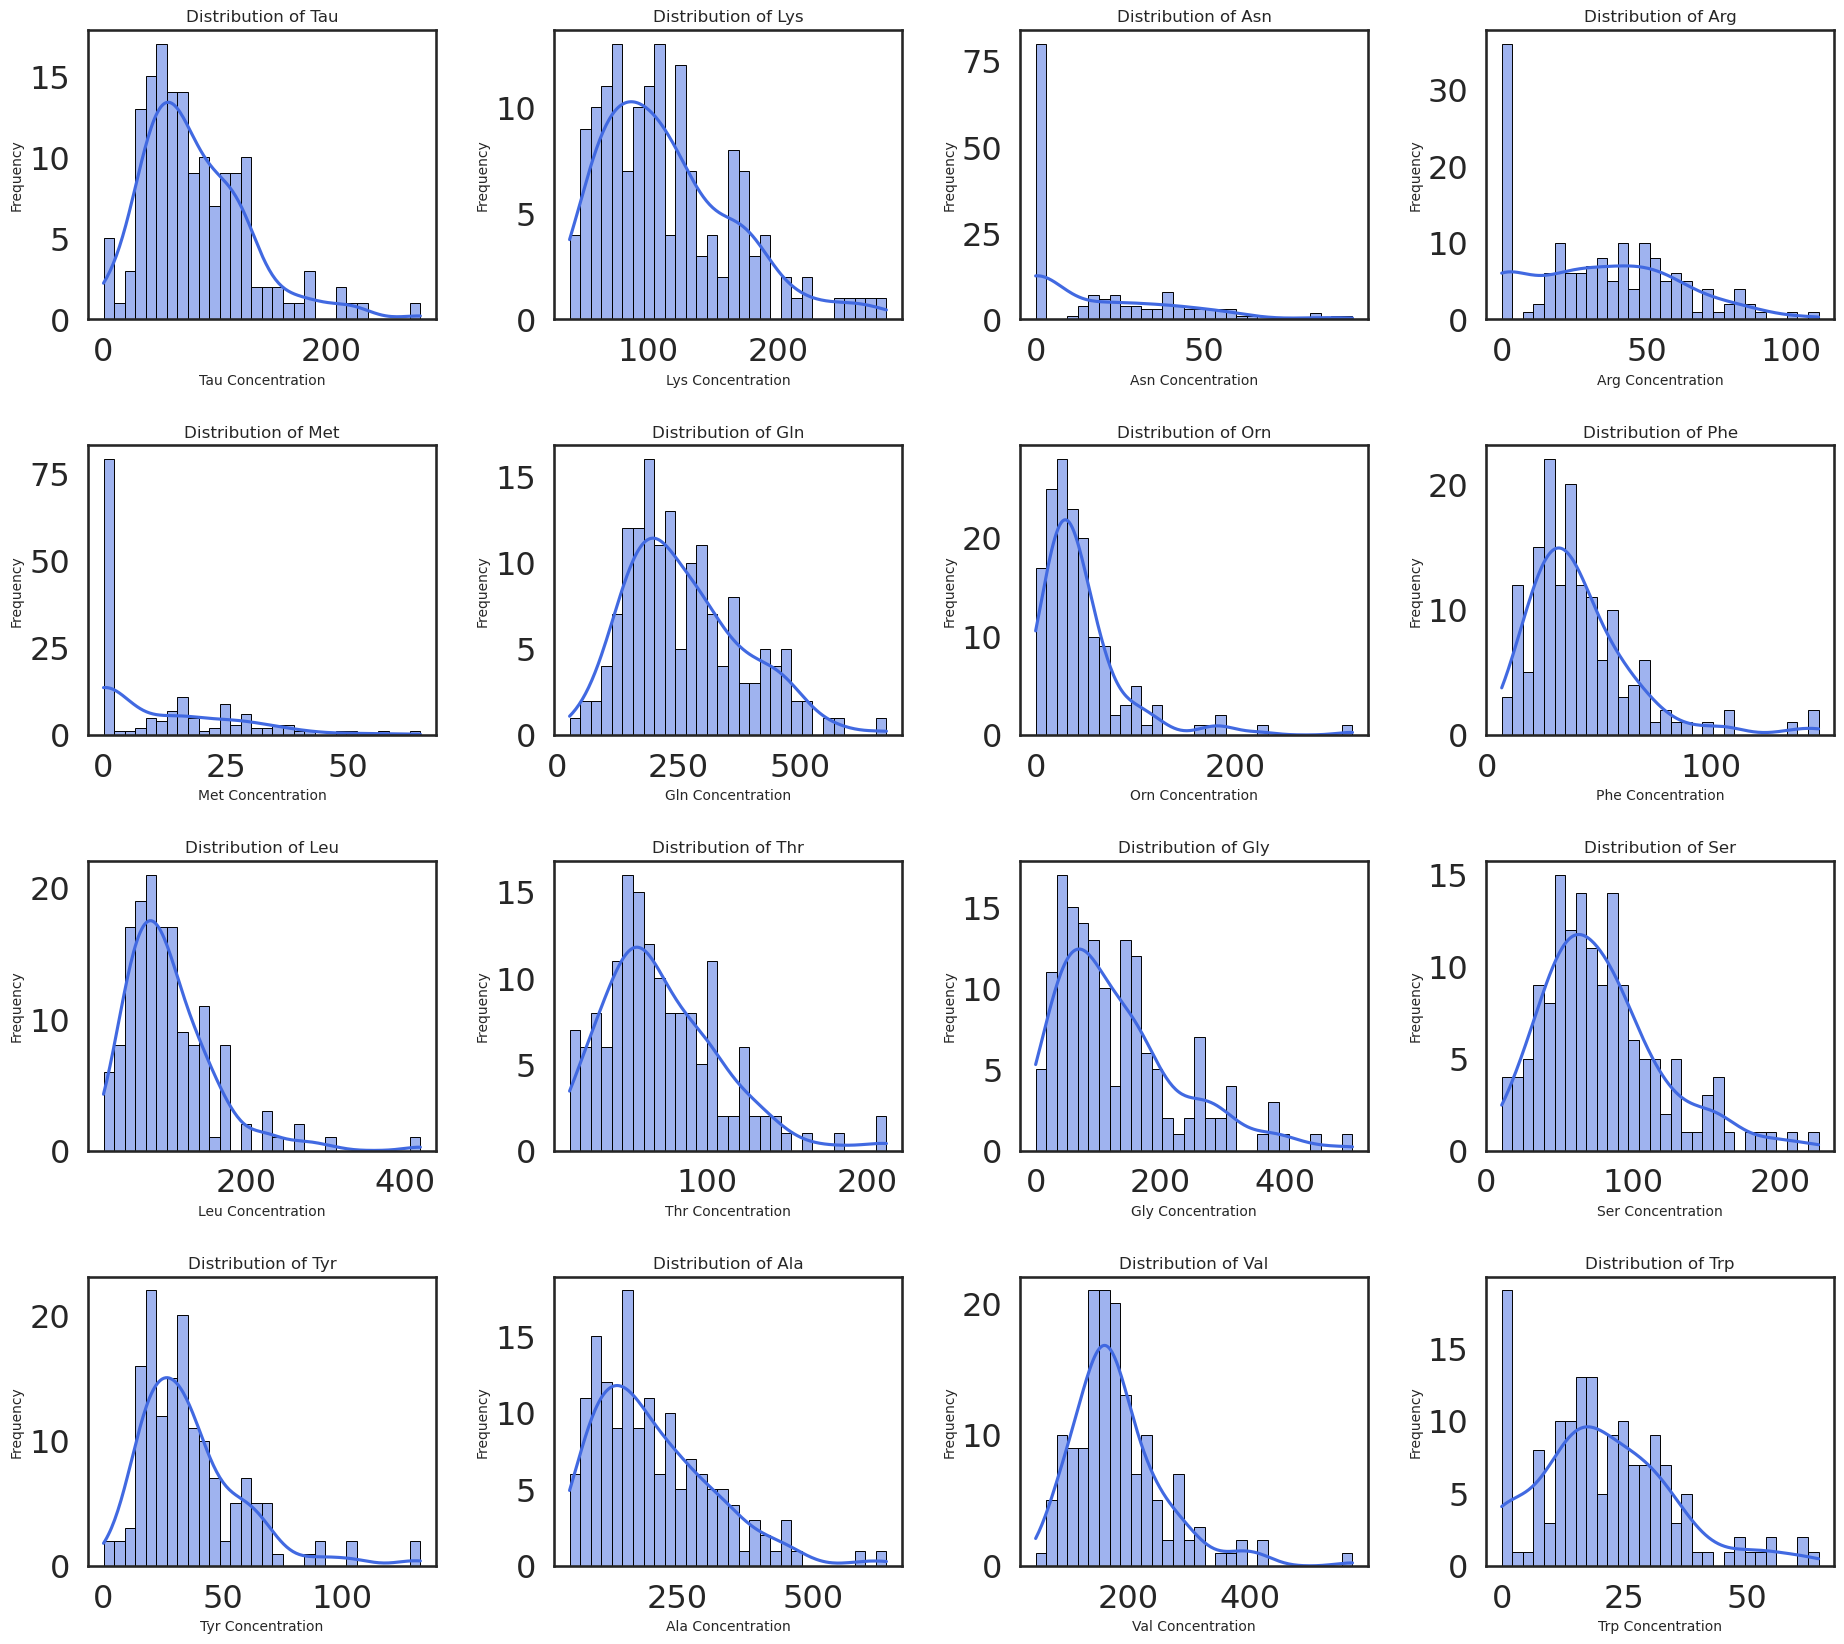

In [185]:
# Create histograms with KDE for each amino acid (fixed layout issue)
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(19, 17))
axes = axes.flatten()

for i, aa in enumerate(amino_acids):
    ax = axes[i]
    sns.histplot(AA_df[aa], bins=30, kde=True, color='royalblue', edgecolor='black', ax=ax)
    ax.set_title(f'Distribution of {aa}', fontsize=12)
    ax.set_xlabel(f'{aa} Concentration', fontsize=10)
    ax.set_ylabel('Frequency', fontsize=10)

plt.tight_layout()
plt.show()


## Data Pre-processing

In [186]:
## Data Pre-processing
target_amino_acids = amino_acids + ['Ile+Glu']
AA_df['Total'] = AA_df[target_amino_acids].sum(axis=1)
for aa in amino_acids:
    AA_df[f'{aa}_ratio'] = AA_df[aa] / AA_df['Total']
    AA_df[f'log1p_{aa}_ratio'] = np.log1p(AA_df[f'{aa}_ratio'])
scaler = StandardScaler()
zscore_columns = [f'zscore_log1p_{aa}_ratio' for aa in amino_acids]
AA_df[zscore_columns] = scaler.fit_transform(AA_df[[f'log1p_{aa}_ratio' for aa in amino_acids]])


In [187]:
AA_df

,Sample,Tau,Lys,Asn,Arg,Met,Gln,Orn,Phe,Leu,...,zscore_log1p_Orn_ratio,zscore_log1p_Phe_ratio,zscore_log1p_Leu_ratio,zscore_log1p_Thr_ratio,zscore_log1p_Gly_ratio,zscore_log1p_Ser_ratio,zscore_log1p_Tyr_ratio,zscore_log1p_Ala_ratio,zscore_log1p_Val_ratio,zscore_log1p_Trp_ratio
0,Patient-144,97.411,103.533,31.423,0.000,15.808,197.833,31.726,37.455,93.192,...,-0.162034,0.152886,0.093370,-0.044366,0.152915,0.022704,0.628946,0.623896,-0.044536,-0.189915
1,Patient-145,73.993,70.206,21.191,0.000,0.000,367.578,0.000,27.415,238.829,...,-1.634952,-1.272537,3.593241,-2.288326,0.719866,-2.321010,-1.336362,-1.612993,2.248412,-0.045365
2,Patient-146,65.505,90.469,0.000,0.000,0.000,181.527,0.000,16.784,89.368,...,-1.634952,-0.955493,1.608117,-1.105244,-1.434708,0.004471,-0.299594,-1.587577,2.427275,-0.123124
3,Patient-147,42.170,77.167,0.000,41.121,0.000,192.521,13.172,21.775,30.512,...,-0.744994,-0.367183,-1.852775,0.010099,2.002122,0.670343,-0.585404,-0.572253,-1.213044,-0.883590
4,Patient-148,128.726,139.303,39.297,54.231,48.967,356.260,63.024,34.642,133.589,...,0.265875,-1.159915,-0.145807,-0.468909,0.634667,-0.385020,-0.004650,-0.025809,-0.522311,-0.033468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,Patient-024,124.315,172.431,0.000,58.213,28.906,367.515,103.372,77.159,144.639,...,0.991169,0.604540,-0.429072,-0.419689,1.231598,1.107312,-0.480444,0.571756,-0.893614,0.910368
148,Patient-025,152.506,131.335,43.920,29.851,27.922,415.112,118.936,64.782,120.672,...,1.442654,0.075112,-0.894220,-0.871145,1.112297,-0.786683,0.824704,0.531368,-1.250829,0.277375
149,Patient-026,119.279,207.649,90.775,62.947,51.336,678.529,93.942,64.417,107.694,...,0.165393,-0.798508,-1.837796,-0.638209,1.961577,1.037326,0.569250,-0.059298,-1.542917,-0.267997
150,Patient-027,0.000,53.241,0.000,16.388,0.000,137.560,11.158,14.486,21.526,...,-0.423088,-0.166768,-1.608620,1.576328,2.025068,-0.308298,-2.790035,0.440505,-1.159884,-1.647282


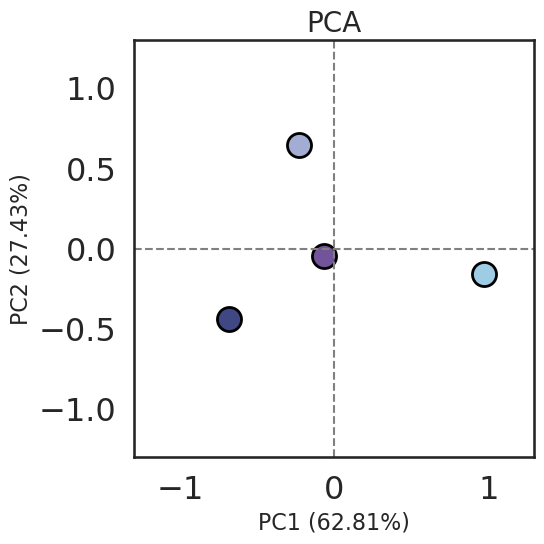

In [188]:
# Calculate stage-wise mean of amino acid features
grouped = AA_df.groupby('pTNM stage')[zscore_columns].mean().loc[[1, 2, 3, 4]]

# Run PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(grouped)

# Format result into DataFrame
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
pca_df['Stage'] = ['Stage I', 'Stage II', 'Stage III', 'Stage IV']

# Color settings for plotting
colors = {"Stage I": '#9ECCE4', "Stage II": '#A3ADD3', "Stage III": '#715499', "Stage IV": '#404884'}

# Plot PCA result
plt.figure(figsize=(6, 6))
for stage in pca_df['Stage']:
    data = pca_df[pca_df['Stage'] == stage]
    plt.xlim(-1.3, 1.3)
    plt.ylim(-1.3, 1.3)
    plt.scatter(data['PC1'], data['PC2'], label=stage, color=colors[stage], s=200, edgecolor='black', linewidths=2)

# Reference lines
plt.axhline(0, color='gray', linestyle='--', linewidth=1.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=1.5)

# Axis labels with variance
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.2f}%)', fontsize=16)
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.2f}%)', fontsize=16)

# Title
plt.title('PCA', fontsize=20)
plt.tight_layout()
plt.savefig("PCA_replace.pdf", format="pdf",dpi=300, bbox_inches="tight")
plt.show()


In [157]:
# PCA loading scores for each amino acid
loading_scores = pd.DataFrame(
    pca.components_.T,
    columns=['PC1', 'PC2'],
    index=amino_acids
)

# Ranked contributions to PC1 and PC2
top_contributors_pc1 = loading_scores['PC1'].sort_values(ascending=False)
top_contributors_pc2 = loading_scores['PC2'].sort_values(ascending=False)

print("Top contributors to PC1:")
print(top_contributors_pc1)

print("\nTop contributors to PC2:")
print(top_contributors_pc2)


Top contributors to PC1:
Val    0.513161
Leu    0.490922
Trp    0.193559
Lys    0.175890
Ala    0.054491
Met    0.042028
Tau   -0.001098
Tyr   -0.033918
Gln   -0.091050
Asn   -0.115105
Arg   -0.185251
Phe   -0.227955
Gly   -0.231982
Thr   -0.269931
Orn   -0.302247
Ser   -0.309063
Name: PC1, dtype: float64

Top contributors to PC2:
Tau    0.599697
Thr    0.320937
Lys    0.271784
Ala    0.228282
Gln    0.166031
Orn    0.080688
Trp    0.057305
Arg    0.050016
Ser   -0.014207
Leu   -0.072800
Val   -0.107920
Phe   -0.213971
Met   -0.216985
Tyr   -0.257943
Gly   -0.271375
Asn   -0.348322
Name: PC2, dtype: float64


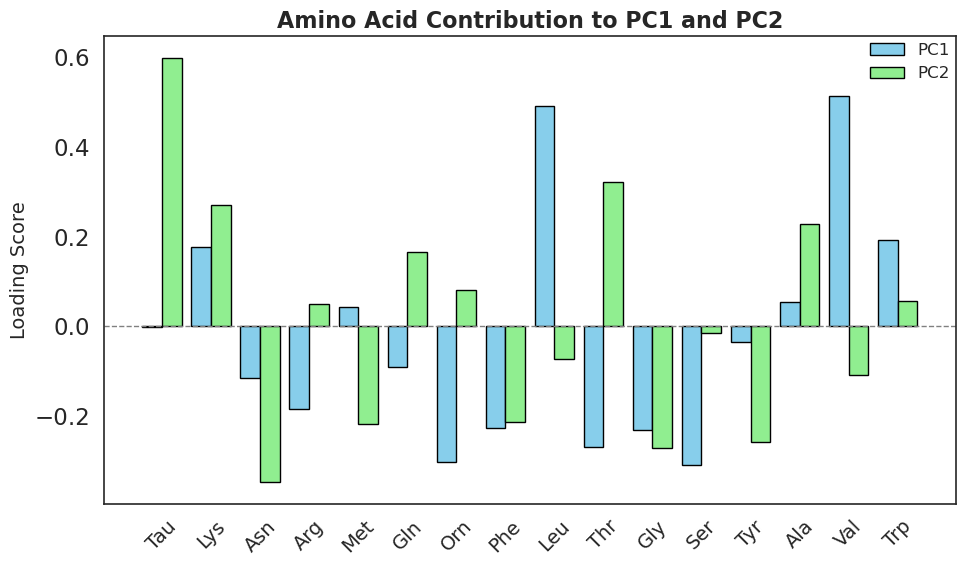

In [158]:
# Bar plot showing amino acid contributions to PC1 and PC2
plt.figure(figsize=(10, 6))
bar_width = 0.4
x = np.arange(len(loading_scores.index))

plt.bar(x - bar_width / 2, loading_scores['PC1'], width=bar_width,
        color='skyblue', edgecolor='black', label='PC1')
plt.bar(x + bar_width / 2, loading_scores['PC2'], width=bar_width,
        color='lightgreen', edgecolor='black', label='PC2')

# Axis labels and aesthetics
plt.title('Amino Acid Contribution to PC1 and PC2', fontsize=16, fontweight='bold')
plt.ylabel('Loading Score', fontsize=14)
plt.xticks(x, loading_scores.index, rotation=45, fontsize=14)
plt.axhline(0, color='gray', linestyle='--', linewidth=1)

# Legend
plt.legend(fontsize=12, title_fontsize=12, loc='upper right',
           bbox_to_anchor=(1.0, 1), borderaxespad=0, frameon=False)

# Emphasize plot frame
for spine in ['top', 'right', 'left', 'bottom']:
    plt.gca().spines[spine].set_linewidth(1.2)

plt.tight_layout()
plt.show()


## Clustermap

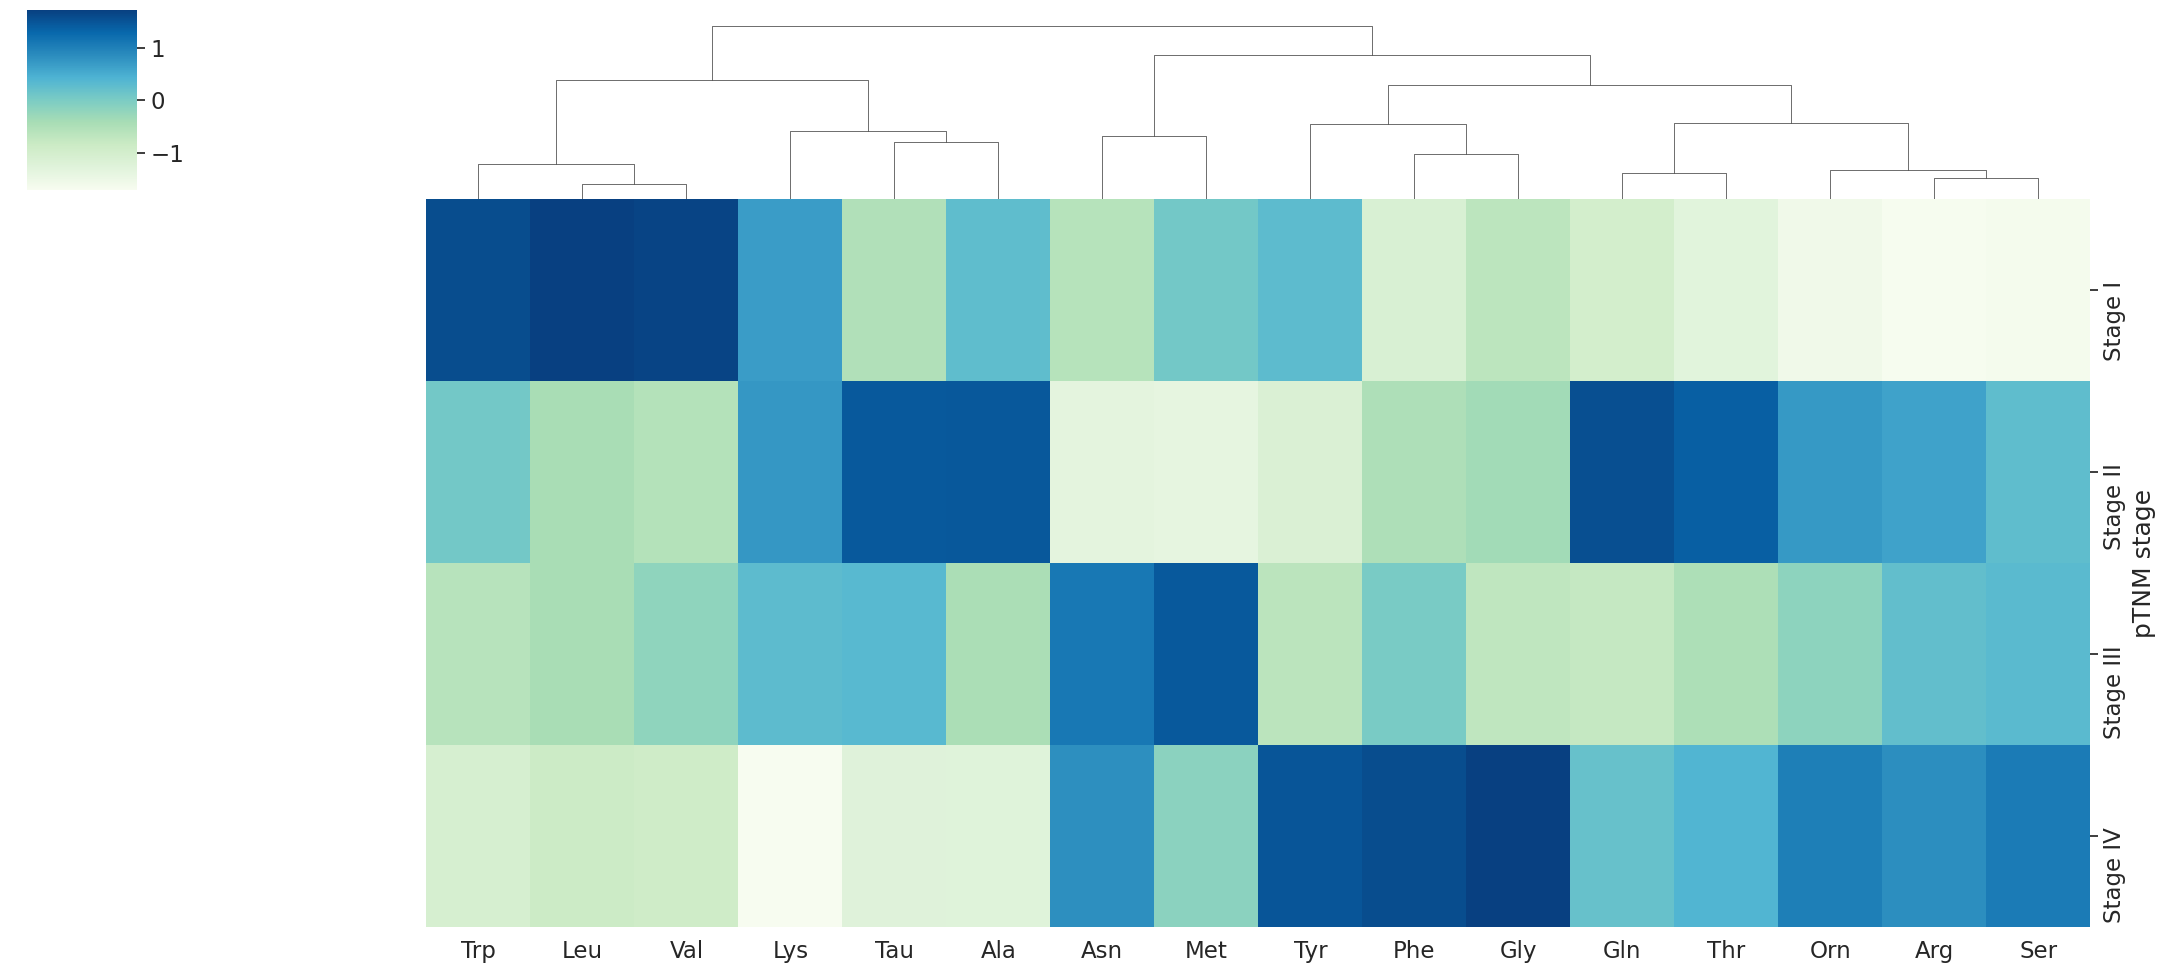

In [159]:
# Extract log1p-transformed ratio values and stage info
df = AA_df[[f'log1p_{aa}_ratio' for aa in amino_acids]].copy()
df['pTNM stage'] = AA_df['pTNM stage']

# Calculate stage-wise mean and rename axes
cluster_input = df.groupby('pTNM stage').mean().loc[[1, 2, 3, 4]]
cluster_input.columns = amino_acids
cluster_input.index = cluster_input.index.map({1: "Stage I", 2: "Stage II", 3: "Stage III", 4: "Stage IV"})

# Z-score normalization across stages (row: stage, col: amino acid)
cluster_input_z = cluster_input.apply(zscore)

# Plot clustermap of amino acid expression patterns across stages
sns.set_context("notebook", font_scale=1.5)
g = sns.clustermap(
    cluster_input_z,
    cmap='GnBu',
    method='average',
    metric='euclidean',
    row_cluster=False,  # keep stage order
    col_cluster=True,   # cluster amino acids
    figsize=(22, 10)
)
plt.show()


## Radar chart

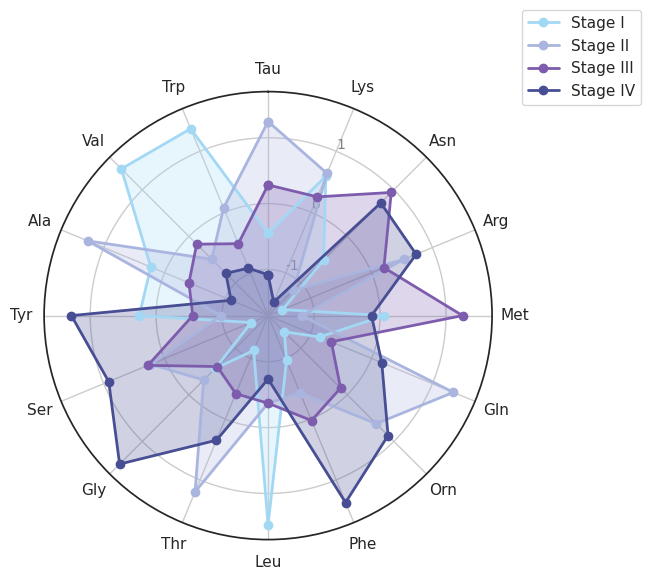

In [160]:
# Define color and label mapping for each stage
stage_colors = {1: '#A3D8F4', 2: '#A9B5DF', 3: '#7E5CAD', 4: '#474E93'}
stage_labels = {1: 'Stage I', 2: 'Stage II', 3: 'Stage III', 4: 'Stage IV'}

# Select log1p-transformed amino acid columns
log1p_columns = [f'log1p_{aa}_ratio' for aa in amino_acids]

# Compute stage-wise average of log1p-transformed values
df = AA_df[log1p_columns].copy()
df['pTNM stage'] = AA_df['pTNM stage']
grouped = df.groupby('pTNM stage')[log1p_columns].mean().loc[[1,2,3,4]]

# Z-score normalization across stages
grouped_z = grouped.apply(lambda col: (col - col.mean()) / col.std(), axis=0)

# Setup angles for radar chart
N = len(amino_acids)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# Create radar chart
plt.figure(figsize=(7,7))
ax = plt.subplot(111, polar=True)
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)

# Set x and y axis labels
plt.xticks(angles[:-1], amino_acids, fontsize=11)
plt.yticks([-1,0,1], ["-1","0","1"], color="grey", size=10)
plt.ylim(-1.7, 1.7)

# Plot each stage's profile
for stage in [1,2,3,4]:
    if stage in grouped_z.index:
        values = grouped_z.loc[stage].values.tolist()
        values += values[:1]
        color = stage_colors[stage]
        label = stage_labels[stage]
        ax.plot(angles, values, linewidth=2, marker='o', markersize=6,
                label=label, color=color)
        ax.fill(angles, values, color, alpha=0.25)

plt.legend(loc='upper center', bbox_to_anchor=(1.2,1.2), fontsize=11, frameon=True)
plt.tight_layout()
#plt.savefig("new_radar.pdf", format="pdf",dpi=300, bbox_inches="tight")
plt.show()

## Fuzzy c-means clustering

/tmp/ipykernel_208561/1785022183.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = AA_df.groupby("pTNM stage")[amino_cols].mean().reindex(stage_order)
/tmp/ipykernel_208561/1785022183.py:43: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cluster_cmaps = {0: cm.get_cmap('Reds'), 1: cm.get_cmap('Greens'), 2: cm.get_cmap('Blues')}


Cluster 1 top metabolite: Leu (membership=0.988)
Cluster 2 top metabolite: Phe (membership=0.940)
Cluster 3 top metabolite: Ala (membership=0.977)


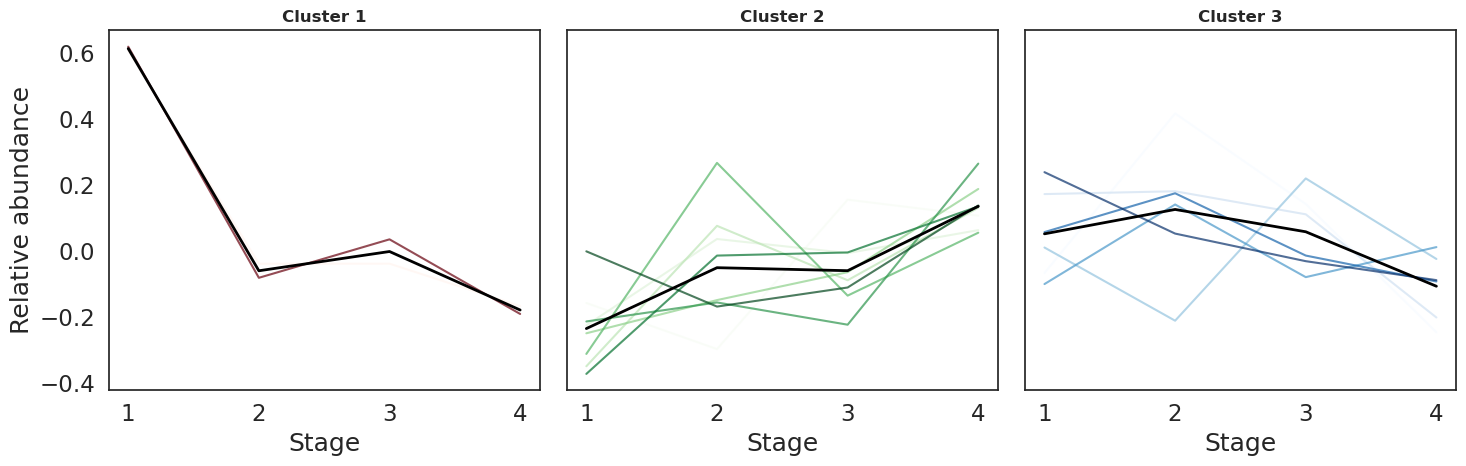

Cluster 1 (2 metabolites):
 - Leu
 - Val

Cluster 2 (8 metabolites):
 - Asn
 - Arg
 - Orn
 - Phe
 - Thr
 - Gly
 - Ser
 - Tyr

Cluster 3 (6 metabolites):
 - Tau
 - Lys
 - Met
 - Gln
 - Ala
 - Trp



In [161]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import skfuzzy as fuzz

stage_order = [1, 2, 3, 4]
amino_cols = [f'zscore_log1p_{aa}_ratio' for aa in amino_acids]
AA_df["pTNM stage"] = pd.Categorical(AA_df["pTNM stage"], categories=stage_order, ordered=True)
grouped = AA_df.groupby("pTNM stage")[amino_cols].mean().reindex(stage_order)
wide_df = grouped.T.fillna(0)
wide_df.index = [col.replace("zscore_log1p_", "").replace("_ratio", "") for col in wide_df.index]
data_for_clustering = wide_df.values.T

# Fuzzy C-means parameters
n_clusters = 3
m = 2.0
error = 0.005
maxiter = 1000

# Perform FCM clustering
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    data_for_clustering, c=n_clusters, m=m, error=error, maxiter=maxiter, init=None, seed=42
)

# Identify top contributing metabolite for each cluster
metabolites = wide_df.index.tolist()
representatives = {}
for c in range(n_clusters):
    membership_c = u[c, :]
    sorted_idx = np.argsort(-membership_c)
    top1_idx = sorted_idx[0]
    top1_metabolite = metabolites[top1_idx]
    top1_value = membership_c[top1_idx]
    representatives[c] = (top1_metabolite, top1_value)
    print(f"Cluster {c+1} top metabolite: {top1_metabolite} (membership={top1_value:.3f})")

# Assign hard labels based on highest membership
hard_labels = np.argmax(u, axis=0)
wide_df['Cluster'] = hard_labels

# Plot cluster-specific trends with colored lines
cluster_cmaps = {0: cm.get_cmap('Reds'), 1: cm.get_cmap('Greens'), 2: cm.get_cmap('Blues')}
fig, axes = plt.subplots(nrows=1, ncols=n_clusters, figsize=(15, 5), sharey=True)
for c in range(n_clusters):
    ax = axes[c]
    subset = wide_df[wide_df["Cluster"] == c].drop(columns="Cluster")
    n = len(subset)
    cmap = cluster_cmaps[c]
    for i, (metab, row) in enumerate(subset.iterrows()):
        color = cmap(i / (n - 1)) if n > 1 else cmap(0.5)
        ax.plot(stage_order, row.values, color=color, alpha=0.7)
    if not subset.empty:
        cluster_mean = subset.mean(axis=0)
        ax.plot(stage_order, cluster_mean.values, color='black', linewidth=2)
    ax.set_title(f"Cluster {c+1}", fontsize=12, fontweight='bold')
    ax.set_xlabel("Stage")
    if c == 0:
        ax.set_ylabel("Relative abundance")
plt.tight_layout()
plt.show()

# Print member metabolites in each cluster
for c in range(n_clusters):
    members = wide_df[wide_df["Cluster"] == c].index.tolist()
    print(f"Cluster {c+1} ({len(members)} metabolites):")
    for m in members:
        print(" -", m)
    print()

## Box plot

In [164]:
from scipy.stats import kruskal
import scikit_posthocs as sp
from statsmodels.stats.multitest import multipletests

# Define the target variables: Z-scored, log1p-transformed amino acid ratios
ratios = [f'zscore_log1p_{aa}_ratio' for aa in amino_acids]

# Initialize result containers
kruskal_results = []
dunn_results = []

for ratio in ratios:
    # 1. Kruskal-Wallis test across pTNM stages
    groups = [group[ratio].values for name, group in AA_df.groupby('pTNM stage')]
    stat, p_value = kruskal(*groups)
    kruskal_results.append([ratio, stat, p_value])

    # 2. If significant, perform post-hoc Dunn’s test (unadjusted)
    if p_value < 0.05:
        dunn_test = sp.posthoc_dunn(
            AA_df, 
            val_col=ratio, 
            group_col='pTNM stage', 
            p_adjust=None
        )
        # Store all pairwise comparisons
        for stage1 in dunn_test.index:
            for stage2 in dunn_test.columns:
                if stage1 < stage2:  # Avoid duplicate pairs
                    dunn_results.append([
                        ratio, stage1, stage2, dunn_test.loc[stage1, stage2]
                    ])

# Convert Kruskal-Wallis test results to DataFrame
kruskal_df = pd.DataFrame(kruskal_results, columns=[
    'Amino Acid (Z-score)', 'H-statistic', 'p-value'
])
print("\nKruskal-Wallis Test Results:")
print(kruskal_df.to_string(index=False))

# Convert Dunn’s test results to DataFrame and apply FDR correction
if dunn_results:
    dunn_df = pd.DataFrame(dunn_results, columns=[
        'Amino Acid (Z-score)', 'Stage 1', 'Stage 2', 'Raw P-value'
    ])
    dunn_df['Adjusted P-value (FDR)'] = multipletests(
        dunn_df['Raw P-value'], method='fdr_bh'
    )[1]

    print("\nDunn’s Test Results (FDR-BH Adjusted):")
    print(dunn_df.to_string(index=False))



Kruskal-Wallis Test Results:
  Amino Acid (Z-score)  H-statistic  p-value
zscore_log1p_Tau_ratio     8.875296 0.030996
zscore_log1p_Lys_ratio     6.514640 0.089087
zscore_log1p_Asn_ratio     7.392390 0.060389
zscore_log1p_Arg_ratio     1.370420 0.712483
zscore_log1p_Met_ratio     4.120415 0.248752
zscore_log1p_Gln_ratio     0.740869 0.863552
zscore_log1p_Orn_ratio     3.212901 0.359950
zscore_log1p_Phe_ratio     3.882835 0.274397
zscore_log1p_Leu_ratio     5.471143 0.140375
zscore_log1p_Thr_ratio     5.876640 0.117769
zscore_log1p_Gly_ratio     7.978135 0.046466
zscore_log1p_Ser_ratio     3.985924 0.262988
zscore_log1p_Tyr_ratio     5.171729 0.159646
zscore_log1p_Ala_ratio     1.057342 0.787381
zscore_log1p_Val_ratio     8.038529 0.045222
zscore_log1p_Trp_ratio     3.376298 0.337164

Dunn’s Test Results (FDR-BH Adjusted):
  Amino Acid (Z-score)  Stage 1  Stage 2  Raw P-value  Adjusted P-value (FDR)
zscore_log1p_Tau_ratio        1        2     0.185654                0.371307
zscore_lo

/tmp/ipykernel_208561/673748672.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = [group[ratio].values for name, group in AA_df.groupby('pTNM stage')]
/home/ezeon/anaconda3/envs/VRPGP/lib/python3.11/site-packages/scikit_posthocs/_posthocs.py:368: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  x_lens = x.groupby(_group_col)[_val_col].count()
/home/ezeon/anaconda3/envs/VRPGP/lib/python3.11/site-packages/scikit_posthocs/_posthocs.py:371: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior o

/tmp/ipykernel_208561/4131057482.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipykernel_208561/4131057482.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipykernel_208561/4131057482.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


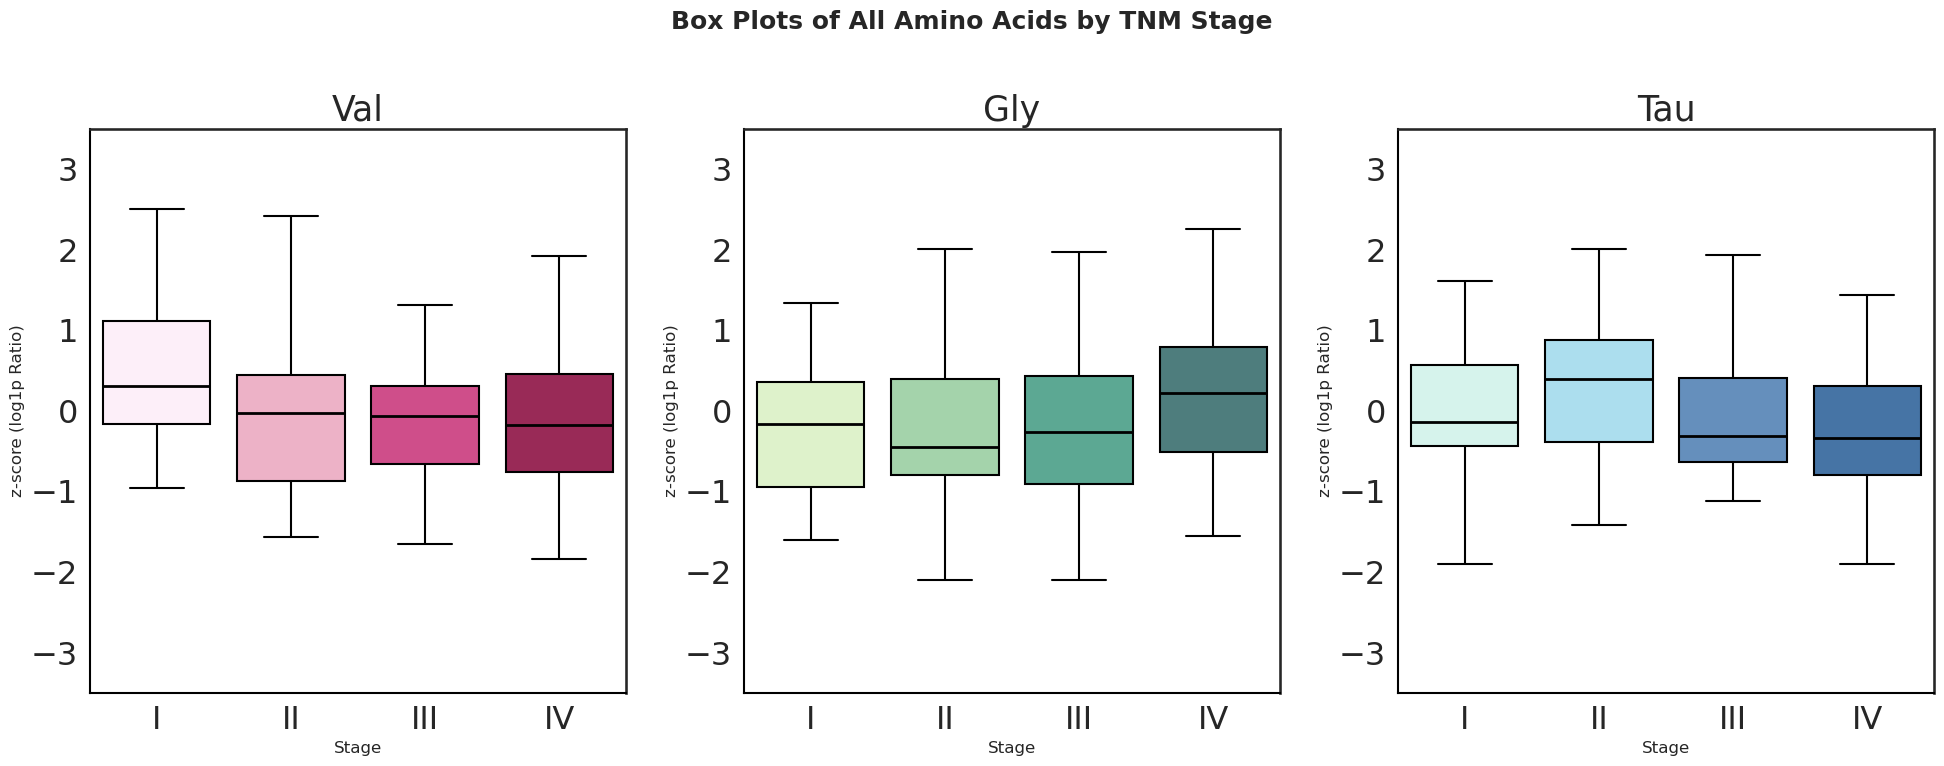

In [162]:
def plot_boxplots_with_gradient(AA_df, amino_acids, stage_col='pTNM stage', figsize=(18, 8), ylim=(-2, 2)):
    sns.set_style("white")
    sns.set_context("talk", font_scale=1.4)
    ratio_cols = [f'zscore_log1p_{aa}_ratio' for aa in amino_acids]
    df_plot = AA_df[[stage_col] + ratio_cols].copy()
    df_melt = df_plot.melt(id_vars=stage_col, var_name='AminoAcid', value_name='value')
    df_melt['AminoAcid'] = df_melt['AminoAcid'].str.replace('zscore_log1p_', '', regex=False).str.replace('_ratio', '', regex=False)
    df_melt[stage_col] = df_melt[stage_col].map({1: "I", 2: "II", 3: "III", 4: "IV"})
    gradient_colors = {
        "Val": ["#FFEDFA", "#F7A8C4", "#E53888", "#AC1754"],
        "Gly": ["#DEF9C4", "#9CDBA6", "#50B498", "#468585"],
        "Tau": ["#D1F8EF", "#A1E3F9", "#578FCA", "#3674B5"]
    }
    fig, axes = plt.subplots(nrows=len(amino_acids)//4 + 1, ncols=min(4, len(amino_acids)), figsize=figsize, facecolor='white')
    axes = axes.flatten()
    for i, aa in enumerate(amino_acids):
        ax = axes[i]
        sns.boxplot(
            data=df_melt[df_melt["AminoAcid"] == aa],
            x=stage_col, y="value", ax=ax, showfliers=False, linewidth=1.5,
            palette=gradient_colors.get(aa, ["#BBBBBB"] * 4),
            boxprops=dict(edgecolor="black", linewidth=1.5),
            whiskerprops=dict(color="black", linewidth=1.5),
            capprops=dict(color="black", linewidth=1.5),
            medianprops=dict(color="black", linewidth=2)
        )
        ax.set_ylim(ylim)
        ax.set_title(aa, fontsize=25)
        ax.set_xlabel("Stage", fontsize=12)
        ax.set_ylabel("z-score (log1p Ratio)", fontsize=12)
        ax.spines['bottom'].set_color('black')
        ax.spines['left'].set_color('black')
        ax.spines['bottom'].set_linewidth(1.5)
        ax.spines['left'].set_linewidth(1.5)
        ax.tick_params(axis='both', which='major', width=1.5, length=5, color='black')
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])
    plt.suptitle("Box Plots of All Amino Acids by TNM Stage", fontsize=18, fontweight="bold")
    plt.tight_layout()
    plt.show()

plot_boxplots_with_gradient(
    AA_df, amino_acids=["Val","Gly","Tau"], stage_col='pTNM stage', figsize=(20, 8), ylim=(-3.5, 3.5)
)


## Recurrence or metastasis state

In [165]:
# Define metastasis status: patients in stage 4 are considered metastatic
AA_df['Metastasis_Status'] = AA_df['pTNM stage'].apply(lambda x: 'Yes' if x == 4 else 'No')
# Assign 'Yes' to patients in stage 4 (metastatic), otherwise 'No'
cond = (AA_df['pTNM stage'].isin([1, 2, 3])) & (AA_df['Recurrence'].isna())
AA_df = AA_df[~cond].copy()  # Make a safe copy to avoid SettingWithCopyWarning
# Create a new column combining both recurrence and metastasis status
AA_df['Meta_or_Recur'] = AA_df.apply(
    lambda row: 'Yes' if row['Metastasis_Status'] == 'Yes' or row['Recurrence'] == 'Yes' else 'No',
    axis=1
)


Meta_or_Recur vs Gly_Group
Raw counts:
Meta_or_Recur  No  Yes
Gly_Group             
High           31   45
Low            48   28
Percentage (%):
Meta_or_Recur         No        Yes
Gly_Group                          
High           40.789474  59.210526
Low            63.157895  36.842105

Fisher's exact test p-value for Gly_ratio: 0.00916


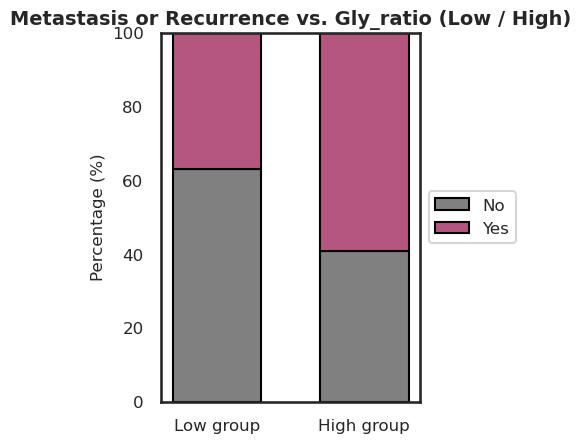

In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from scipy.stats import fisher_exact

# 1. Dichotomize Gly_ratio based on median
median_gly = AA_df['Gly_ratio'].median()
AA_df['Gly_Group'] = np.where(AA_df['Gly_ratio'] >= median_gly, 'High', 'Low')

# 2. Cross-tabulate Gly_Group vs. Meta_or_Recur
ct = pd.crosstab(AA_df['Gly_Group'], AA_df['Meta_or_Recur'])
print("Meta_or_Recur vs Gly_Group")
print("Raw counts:")
print(ct)
ct_perc = ct.div(ct.sum(axis=1), axis=0) * 100
print("Percentage (%):")
print(ct_perc)

# 3. Fisher’s exact test (two-sided)
low_no    = ct.loc['Low', 'No']
low_yes   = ct.loc['Low', 'Yes']
high_no   = ct.loc['High', 'No']
high_yes  = ct.loc['High', 'Yes']

oddsratio, p_value = fisher_exact([[low_no, low_yes],
                                   [high_no, high_yes]],
                                  alternative='two-sided')
print(f"\nFisher's exact test p-value for Gly_ratio: {p_value:.3g}")

# 4. Stacked bar plot (Gray = No, Purple = Yes)
groups = ['Low', 'High']
x = np.arange(len(groups))

plt.figure(figsize=(5, 5))

# Plot stacked bars
plt.bar(x[0], ct_perc.loc['Low', 'No'], color="gray", edgecolor="black", width=0.6)
plt.bar(x[0], ct_perc.loc['Low', 'Yes'], bottom=ct_perc.loc['Low', 'No'],
        color="#B5567F", edgecolor="black", width=0.6)
plt.bar(x[1], ct_perc.loc['High', 'No'], color="gray", edgecolor="black", width=0.6)
plt.bar(x[1], ct_perc.loc['High', 'Yes'], bottom=ct_perc.loc['High', 'No'],
        color="#B5567F", edgecolor="black", width=0.6)

# Axis and labels
plt.xticks(x, ['Low group', 'High group'], fontsize=12)
plt.ylim(0, 100)
plt.yticks(fontsize=12) 
plt.ylabel("Percentage (%)", fontsize=12)
plt.title("Metastasis or Recurrence vs. Gly_ratio (Low / High)", fontsize=14, fontweight="bold")

# Legend
patch_no = mpatches.Patch(facecolor="gray", edgecolor='black', label="No")
patch_yes = mpatches.Patch(facecolor="#B5567F", edgecolor='black', label="Yes")
plt.legend(handles=[patch_no, patch_yes],
           loc='center left',
           bbox_to_anchor=(1, 0.5),
           frameon=True,
           fontsize=12
          )

plt.tight_layout()
# plt.savefig("Meta_or_Recur_plot.pdf", format="pdf", dpi=300, bbox_inches="tight")
plt.show()
